### 얼굴 인식 및 크롭

In [2]:
import cv2

for i in range(1,104):
    # Read the input image
    img = cv2.imread('./image_woman/w ('+str(i)+').jpeg')
  
    # Convert into grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  
    # Load the cascade
    face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_alt2.xml')
  
    # Detect faces
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)
  
    # Draw rectangle around the faces and crop the faces
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
        faces = img[y:y + h, x:x + w]
        #cv2.imshow("face",faces)
        cv2.imwrite('./face_woman/f_w ('+str(i)+').jpeg', faces)
      
    # Display the output
    #cv2.imwrite('detcted.jpg', img)
    #cv2.imshow('img', img)
    #cv2.waitKey()

### 사진의 피부부분만 인식해서 폴더로 저장해주는 코드입니다. 아래 경로를 똑같이 만들어주세요!

In [35]:
# Required modules
import cv2
import numpy as np
import matplotlib.pyplot as plt

for i in range(1,104):
    min_HSV = np.array([0, 58, 30], dtype = "uint8")
    max_HSV = np.array([33, 255, 255], dtype = "uint8")
    # Get pointer to video frames from primary device
    image = cv2.imread('./face_woman/f_w ('+str(i)+').jpeg')
    imageHSV = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    skinRegionHSV = cv2.inRange(imageHSV, min_HSV, max_HSV)

    skinHSV = cv2.bitwise_and(image, image, mask = skinRegionHSV)

    cv2.imwrite('./skin_woman/s_w ('+str(i)+').jpeg', np.hstack([image, skinHSV]))


error: OpenCV(4.5.4-dev) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [47]:
# Import all essential libraries
import cv2
import numpy as np

for i in range(1,104):
    # minRange for min skin color Rnage
    # maxRange for maximum skin color Range
    minRange = np.array([0,133,77],np.uint8)
    maxRange = np.array([235,173,127],np.uint8)
    image = cv2.imread('./face_woman/f_w ('+str(i)+').jpeg')
    # change our image bgr to ycr using cvtcolor() method 
    YCRimage = cv2.cvtColor(image,cv2.COLOR_BGR2YCR_CB)
    # apply min or max range on skin area in our image
    skinArea = cv2.inRange(YCRimage,minRange,maxRange)
    detectedSkin = cv2.bitwise_and(image, image, mask = skinArea)
    cv2.imwrite('./skin_woman/s_w ('+str(i)+').jpeg', 
            np.hstack([detectedSkin]))

error: OpenCV(4.5.4-dev) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


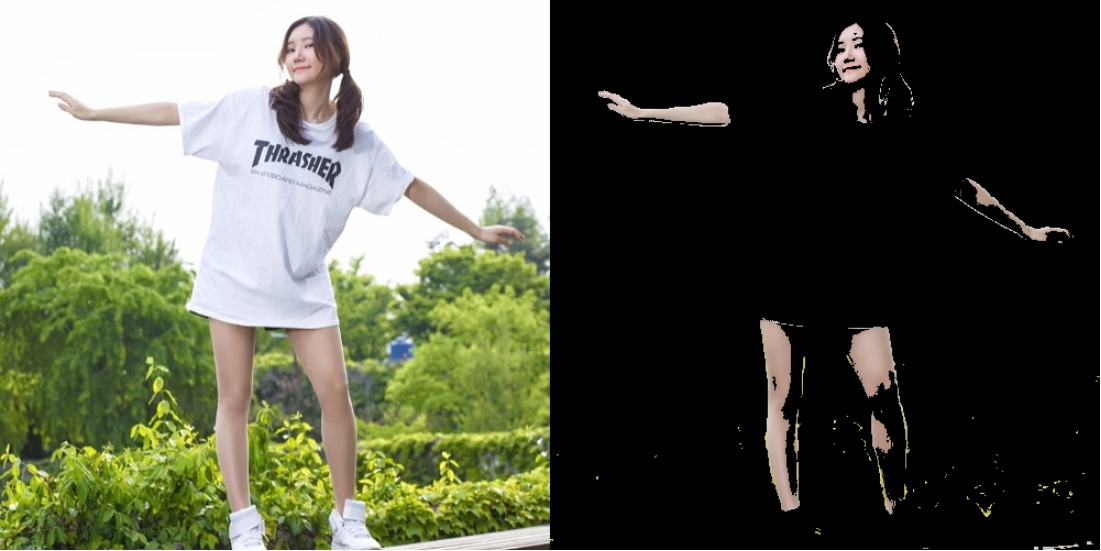

In [24]:
pip install scikit-image

Note: you may need to restart the kernel to use updated packages.


### 평균 피부색 구하는 코드 // 색상은 창으로 띄어져서 올라옵니다 작은창이니 모서리를 유심히 보시길!!

In [70]:
import cv2, numpy as np
from sklearn.cluster import KMeans
import itertools

def visualize_colors(cluster, centroids):
    global Max
    # Get the number of different clusters, create histogram, and normalize
    labels = np.arange(0, len(np.unique(cluster.labels_)) + 1)
    (hist, _) = np.histogram(cluster.labels_, bins = labels)
    hist = hist.astype("float")
    hist /= hist.sum()

    # Create frequency rect and iterate through each cluster's color and percentage
    rect = np.zeros((50, 300, 3), dtype=np.uint8)
    #colors = sorted([(percent, color) for (percent, color) in zip(hist, centroids)])
    list_color = []
    for (percent, color) in zip(hist, centroids):
        list_color.append([percent,color])
    colors = list_color
    colors.sort(key=lambda x:x[0])
    
    start = 0
    for (percent, color) in colors:
        print(color, "{:0.2f}%".format(percent * 100))
        end = start + (percent * 300)
        cv2.rectangle(rect, (int(start), 0), (int(end), 50), \
                      color.astype("uint8").tolist(), -1)
        start = end
        color_list = color.tolist()
        color_RGB.append(color_list)
    return rect

color_RGB = []
color_RGB_int = []
colors_RGB = []

for i in range(1,104):
    # Load image and convert to a list of pixels
    image = cv2.imread('./skin_woman/s ('+str(i)+').jpeg')
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    reshape = image.reshape((image.shape[0] * image.shape[1], 3))

    # Find and display most dominant colors
    cluster = KMeans(n_clusters=5).fit(reshape)
    visualize = visualize_colors(cluster, cluster.cluster_centers_)
    visualize = cv2.cvtColor(visualize, cv2.COLOR_RGB2BGR)
    
    color_RGB = color_RGB[-1:]
    
    color_RGB = np.array(color_RGB).flatten().tolist()
    for i in color_RGB:
        color_RGB_int.append(int(i))
    colors_RGB.append(color_RGB_int)

    print('---------------------------------------------')
    
cv2.imshow('visualize', visualize)
cv2.waitKey()
def chain(*iterables):
    for it in iterables:
        for element in it:
            yield element
colors_RGB = list(itertools.chain(*colors_RGB))
colors_RGB_list = []
colors_RGB_list_final = []
cnt = 0
for i in colors_RGB:
    cnt+=1
    colors_RGB_list.append(i)
    if cnt%3 == 0:
        colors_RGB_list_final.append(colors_RGB_list)
        colors_RGB_list = []
print(colors_RGB_list_final)

[148.8  125.32  97.72] 4.25%
[182.34177215 158.58227848 147.02531646] 13.44%
[196.56198347 174.28099174 160.60330579] 20.58%
[209.6875     188.60795455 177.33522727] 29.93%
[220.56149733 203.57219251 192.74331551] 31.80%
---------------------------------------------
[145.4  116.52 102.18] 5.79%
[162.30188679 131.64150943 115.95597484] 18.40%
[198.20467836 167.39766082 150.35672515] 19.79%
[173.91847826 142.95652174 129.73369565] 21.30%
[187.81666667 156.04       140.45666667] 34.72%
---------------------------------------------
[185.27272727 150.13636364 129.68181818] 10.58%
[166.16666667 131.26666667 111.4       ] 14.42%
[144.85365854 112.43902439  94.63414634] 19.71%
[113.1509434   83.30188679  67.58490566] 25.48%
[126.96774194  97.06451613  81.70967742] 29.81%
---------------------------------------------
[169. 141. 129.] 2.08%
[184.54545455 158.18181818 145.36363636] 11.46%
[206.38095238 176.14285714 162.71428571] 21.88%
[197.16666667 165.5        151.29166667] 25.00%
[199.84210526

[203.25 146.25 113.25] 12.12%
[193.53846154 136.30769231  97.38461538] 13.13%
[200.12 142.6  108.56] 25.25%
[197.9375 139.3125 104.75  ] 48.48%
---------------------------------------------
[117.66666667 104.          93.66666667] 1.10%
[159.33333333 135.33333333 120.13333333] 5.51%
[165.53333333 144.23333333 129.16666667] 11.03%
[178.13043478 144.47826087 130.30434783] 33.82%
[172.70454545 140.21212121 124.12878788] 48.53%
---------------------------------------------
[247.53846154 229.53846154 218.        ] 9.29%
[238.76470588 220.29411765 206.29411765] 12.14%
[233.52 213.   199.56] 17.86%
[222.17948718 202.38461538 187.46153846] 27.86%
[227.30434783 207.84782609 193.7173913 ] 32.86%
---------------------------------------------
[255. 245. 233.] 1.19%
[218.8        173.11428571 161.42857143] 20.83%
[176.94594595 117.54054054 103.35135135] 22.02%
[196.95238095 139.83333333 126.16666667] 25.00%
[212.15384615 159.17307692 146.65384615] 30.95%
--------------------------------------------

[79.47368421 39.73684211 22.42105263] 3.06%
[109.8852459   59.06557377  38.32786885] 9.82%
[152.31481481  80.65740741  55.16666667] 17.39%
[144.72195122  73.0195122   41.4195122 ] 33.01%
[128.77192982  66.89035088  40.15350877] 36.71%
---------------------------------------------
[204.625 168.25  150.375] 7.69%
[198.66666667 161.94444444 143.55555556] 17.31%
[180.63157895 144.05263158 123.89473684] 18.27%
[186.51724138 149.72413793 129.4137931 ] 27.88%
[191.33333333 154.86666667 136.33333333] 28.85%
---------------------------------------------
[192.6        150.06666667 143.        ] 15.15%
[208.88235294 164.76470588 158.64705882] 17.17%
[201.26315789 158.73684211 151.89473684] 19.19%
[215.59090909 171.63636364 167.        ] 22.22%
[222.30769231 180.         176.03846154] 26.26%
---------------------------------------------
[226.71428571 199.14285714 196.        ] 10.00%
[224.  196.9 193.6] 14.29%
[215.63636364 186.72727273 184.27272727] 15.71%
[220.94117647 193.29411765 190.17647059]

[159.33333333 131.88888889 124.        ] 9.00%
[140.45454545 113.45454545 106.45454545] 11.00%
[247.51428571 228.68571429 222.42857143] 35.00%
[230.36842105 201.94736842 192.47368421] 38.00%
---------------------------------------------
[50.91304348 36.26086957 39.04347826] 5.32%
[87.13461538 58.80769231 62.23076923] 12.04%
[116.07142857  77.83928571  81.23214286] 25.93%
[164.82051282 101.83760684  74.5982906 ] 27.08%
[142.3125     86.9921875  78.1171875] 29.63%
---------------------------------------------
[[220, 203, 192], [187, 156, 140], [126, 97, 81], [199, 170, 157], [245, 204, 177], [173, 147, 158], [230, 202, 190], [222, 170, 156], [242, 224, 218], [205, 172, 148], [204, 146, 112], [123, 93, 83], [102, 81, 71], [218, 187, 177], [254, 218, 191], [184, 141, 115], [224, 187, 157], [164, 113, 113], [191, 170, 162], [189, 176, 178], [241, 210, 194], [213, 156, 127], [191, 160, 146], [233, 196, 178], [205, 179, 161], [175, 140, 122], [175, 140, 122], [202, 179, 169], [205, 184, 186],

188697

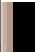

In [29]:
A = [1.12,2.23,3.34]
B = []
for i in A:
    B.append(int(i))
B

[1, 2, 3]

#### 모델 사진에서의 옷 추출

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

class fashion_tools(object):
    def __init__(self,imageid,model,version=1.1):
        self.imageid = imageid
        self.model   = model
        self.version = version
        
    def get_dress(self,stack=False):
        """limited to top wear and full body dresses (wild and studio working)"""
        """takes input rgb----> return PNG"""
        name =  self.imageid
        file = cv2.imread(name)
        file = tf.image.resize_with_pad(file,target_height=512,target_width=512)
        rgb  = file.numpy()
        file = np.expand_dims(file,axis=0)/ 255.
        seq = self.model.predict(file)
        seq = seq[3][0,:,:,0]
        seq = np.expand_dims(seq,axis=-1)
        c1x = rgb*seq
        c2x = rgb*(1-seq)
        cfx = c1x+c2x
        dummy = np.ones((rgb.shape[0],rgb.shape[1],1))
        rgbx = np.concatenate((rgb,dummy*255),axis=-1)
        rgbs = np.concatenate((cfx,seq*255.),axis=-1)
        if stack:
            stacked = np.array((rgbs))
            return stacked
        else:
            return rgbs
        
        
    def get_patch(self):
        return None

for i in range(1,74):
    config = ConfigProto()
    config.gpu_options.allow_growth = True
    session = InteractiveSession(config=config)

    # input 이미지 파일 경로
    f = './data_suit/s ('+str(i)+').jpg'

    saved = load_model("save_ckp_frozen.h5")

   
    ###running code


    api    = fashion_tools(f,saved)
    image_ = api.get_dress(stack=True)
    cv2.imwrite("./cloth/s_c "+str(i)+".png",image_)

'4.5.4-dev'

In [68]:
def visualize_colors(cluster, centroids):
    # Get the number of different clusters, create histogram, and normalize
    labels = np.arange(0, len(np.unique(cluster.labels_)) + 1)
    (hist, _) = np.histogram(cluster.labels_, bins = labels)
    hist = hist.astype("float")
    hist /= hist.sum()

    # Create frequency rect and iterate through each cluster's color and percentage
    rect = np.zeros((50, 300, 3), dtype=np.uint8)
    #colors = sorted([(percent, color) for (percent, color) in zip(hist, centroids)])
    list_color = []
    for (percent, color) in zip(hist, centroids):
        list_color.append([percent,color])
    colors = list_color
    colors.sort(key=lambda x:x[0])
    
    start = 0
    for (percent, color) in colors:
        print(color, "{:0.2f}%".format(percent * 100))
        end = start + (percent * 300)
        #cv2.rectangle(rect, (int(start), 0), (int(end), 50), \
        #              color.astype("uint8").tolist(), -1)
        start = end
        color_list = color.tolist()
        color_RGB.append(color_list)
    return rect

color_RGB = []
color_RGB_int = []
colors_RGB = []

for i in range(1,2):
    # Load image and convert to a list of pixels
    image = cv2.imread('./skin_woman/s (1).jpeg')
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    reshape = image.reshape((image.shape[0] * image.shape[1], 3))

    # Find and display most dominant colors
    cluster = KMeans(n_clusters=5).fit(reshape)
    visualize = visualize_colors(cluster, cluster.cluster_centers_)
    visualize = cv2.cvtColor(visualize, cv2.COLOR_RGB2BGR)
    
    color_RGB = color_RGB[-1:]
    
    color_RGB = np.array(color_RGB).flatten().tolist()
    for i in color_RGB:
        color_RGB_int.append(int(i))
    colors_RGB.append(color_RGB_int)

    print('---------------------------------------------')
    
#cv2.imshow('visualize', visualize)
#cv2.waitKey()
def chain(*iterables):
    for it in iterables:
        for element in it:
            yield element
colors_RGB = list(itertools.chain(*colors_RGB))
colors_RGB_list = []
colors_RGB_list_final = []
cnt = 0
for i in colors_RGB:
    cnt+=1
    colors_RGB_list_final.append(i)
print(colors_RGB_list_final)
        
colors_RGB_str =[]
for i in colors_RGB_list_final:
    colors_RGB_str.append(str(i))
print('컬러:',colors_RGB_str)

[148.8  125.32  97.72] 4.25%
[182.34177215 158.58227848 147.02531646] 13.44%
[196.56198347 174.28099174 160.60330579] 20.58%
[209.6875     188.60795455 177.33522727] 29.93%
[220.56149733 203.57219251 192.74331551] 31.80%
---------------------------------------------
[220, 203, 192]
컬러: ['220', '203', '192']
